Estadistica Aplicada - Proyecto Integrador del Aprendizaje (PIA)

Salvador Almaguer Orta - 2076430 

Originalmente del grupo 41, peor iba a clase en el grupo 44

Nombre de equipo: 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
import seaborn as sns
sns.set() # Para visualizar mejor la grafica

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [2]:
datos = pd.read_excel('base_PIA.xlsx', sheet_name='Inflación', index_col='Periodos',  parse_dates=True)
datos.asfreq('MS')

C:\Users\A\AppData\Local\Temp\ipykernel_10616\3911522624.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos = pd.read_excel('base_PIA.xlsx', sheet_name='Inflación', index_col='Periodos',  parse_dates=True)


,Inflación
Periodos,
1970-01-01,5.20
1970-02-01,4.81
1970-03-01,5.01
1970-04-01,4.87
1970-05-01,5.09
...,...
2023-05-01,5.84
2023-06-01,5.06
2023-07-01,4.79


# Introduccion

### 1. Serie de tiempo

Serie seleccionada: Inflación

La inflacion es un número que refleja o mide cómo han variado los precios de una canasta de bienes y servicios representativos del consumo de una población.

Frecuencia: mensual de 1970 a 2023

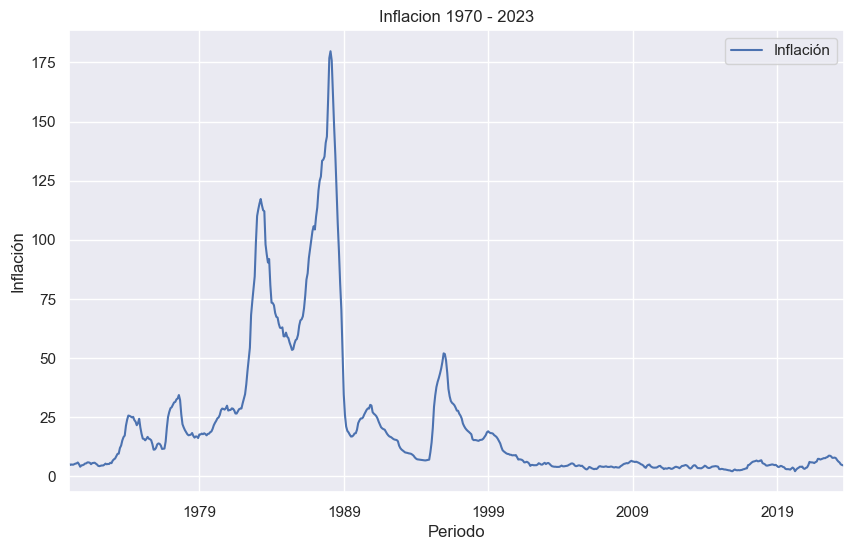

In [3]:
datos.plot()
plt.title('Inflacion 1970 - 2023')
plt.xlabel('Periodo')
plt.ylabel('Inflación')
plt.show()

A simple vista la grafica no nos muestra una clara tendencia por lo que se deteermina que es una serie sin  tendencia.

Como dato curioso el incremento en el periodo entre 1980 a 1990 es a causa de la crisis económica de 1982 en México la cual fue causada por la caída de los precios del petróleo, las exigencias impuestas por el pago puntual de la deuda externa, la apertura de la economía mexicana al exterior y las políticas de ajuste para equilibrar las cuentas con el exterior y la privatización.

### 2. Estacionalidad

Realizando un acercamiento a la grafica en el periodo 2010 - 2020 es mas fácil apreciar que tampoco se registra de un patron estacional.


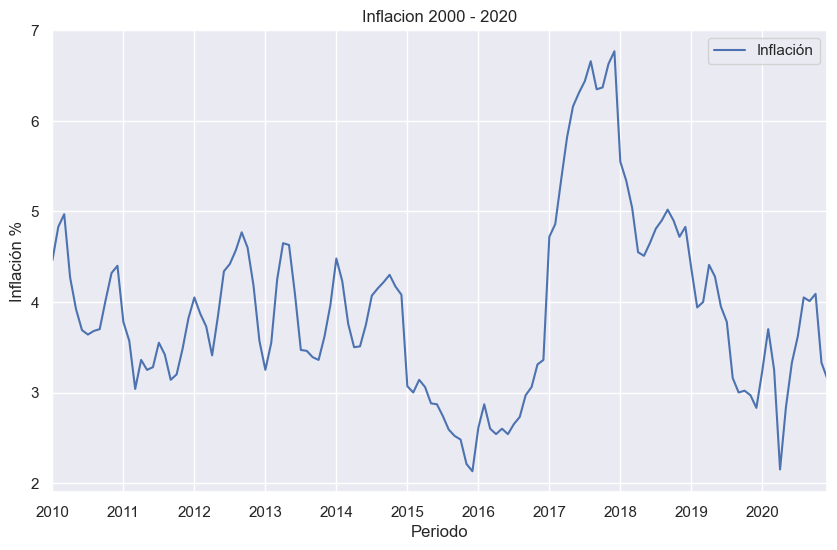

In [4]:
datos['2010':'2020'].plot()
plt.title('Inflacion 2000 - 2020')
plt.xlabel('Periodo')
plt.ylabel('Inflación %')
plt.show()

### 3. Prónostico

Es importante concer el pronostico de la inflacion para diferentes agentes económicos, como los consumidores, los productores, los inversionistas, el gobierno y el banco central.

Conocer el pronostico de la inflacion nos permite a los agentes económicos tomar decisiones más informadas y racionales, así como adaptarse a los cambios en el entorno económico. Además, el pronóstico de la inflación ayuda a generar expectativas más alineadas con la realidad, lo que contribuye a reducir la incertidumbre y a mejorar la confianza en la economía.

In [5]:
# PRÓNOSTICO

### 4. Estadisticas descriptivas

In [6]:
datos.describe()

,Inflación
count,645.000000
mean,21.657705
std,30.416820
min,2.130000
25%,4.510000
50%,8.410000
75%,24.430000
max,179.730000


Esta serie de tiempo cuenta con un promedio de 21.65, el cual no le hace mucha justicia a lo que ah pasado en los ultimos años mas recientes a causa de la crisis economica de 1982 es que esta media se encuentra muy alta. En parte por esto la desviacion estandar tambien esta muy elevada.

Mediante los cuartiles es que nos podemos dar cuenta de lo antes mencionado, ya que como vemos esto nos indica que el 50% de los periodos donde se midio la inflacion, esta a estado por debajo de 8.41%.

Teniendo como minimo una inflacion de 2.13% y un maximo de 179.73%.



### 5. A continuacion se aplicara un promedio movil centrado a 6 meses

In [7]:
datos['PMC_6'] = datos.rolling(7, center=True).mean()

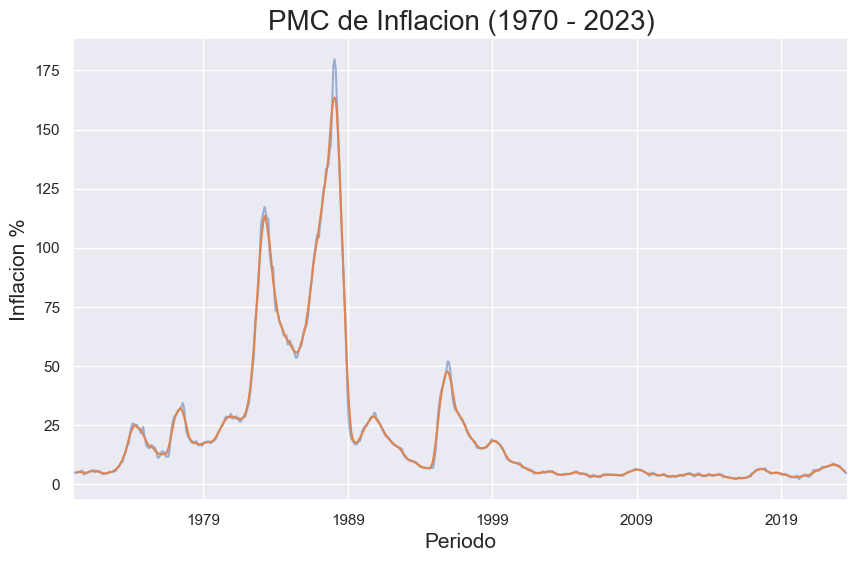

In [8]:
datos['Inflación'].plot(alpha=0.5)
datos['PMC_6'].plot()
plt.title('PMC de Inflacion (1970 - 2023)', fontsize=20)
plt.xlabel('Periodo', fontsize=15)
plt.ylabel('Inflacion %', fontsize=15)
plt.show()

### 6. Descomposicion de la serie de tiempo

In [9]:
componente_esyaconal = sm.tsa.seasonal_decompose(datos['Inflación'], model='mult')

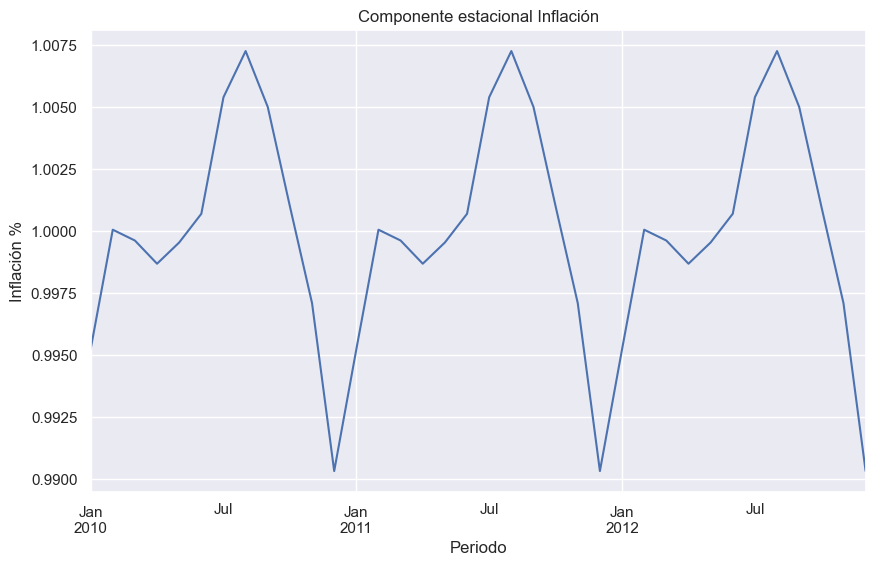

In [10]:
componente_esyaconal.seasonal['2010':'2012'].plot()

plt.title('Componente estacional Inflación')
plt.xlabel('Periodo')
plt.ylabel('Inflación %')

plt.show()

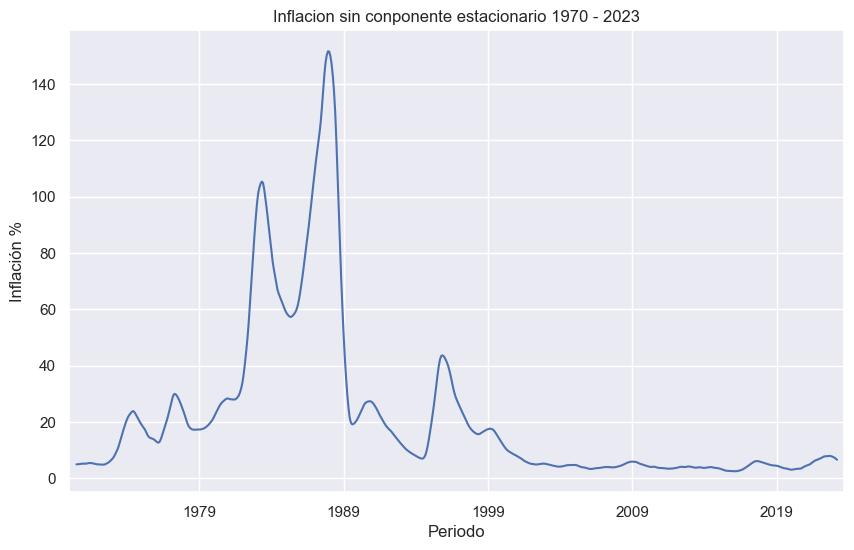

In [11]:
componente_esyaconal.trend.plot()

plt.title('Inflacion sin conponente estacionario 1970 - 2023')
plt.xlabel('Periodo')
plt.ylabel('Inflación %')

plt.show()

En la grafica del componente estacional, podemos notar que en realidad la serie si contaba con un su componente estacional.

La cual nos indica que el punto mas alto de la inflacion en el año se da en el mes de Agosto esto podria ser a causa que se aproximan las fechas festivas, por lo que la gente comienza a ahorrar y de esta manera la inflacion disminuye y a partir de Diciembre vuelve a tener un aumento hasta Febrero a causa de estas fechas fesitvas.

Despues de Febrero se logra mantener estable la inflacion durante un par de meses hasta que llegan las vacaciones de vereano las cuales podrian explicar el aumento en la inflacion hasta Agosto.

### 7. Analisis ARIMA

In [12]:
arimaorder_aic= pm.auto_arima(datos['Inflación'],
                              start_p=1,start_q=1,
                              max_p=7, max_q=7,
                              information_criterion='aic',
                              )
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [13]:
model= ARIMA(datos['Inflación'], order=(1,1,0))
results = model.fit() 
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflación   No. Observations:                  645
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1288.264
Date:                Sun, 12 Nov 2023   AIC                           2580.528
Time:                        21:48:41   BIC                           2589.464
Sample:                    01-01-1970   HQIC                          2583.995
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7686      0.010     79.936      0.000       0.750       0.787
sigma2         3.1949      0.051     63.061      0.000       3.096       3.294
Ljung-Box (L1) (Q):                   0.25   Jarque-

c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### 8. Prueba Raiz unitaria

In [14]:
prueba_adf = adfuller(datos['Inflación'])
pvalor = prueba_adf[1]
print(f'Ho: La serie no es estacionaria\nHa: La serie es estacionaria\n\np_valor = {pvalor.round(2)} = 0.05\nNo rechazamos H0. La serie no es estacionaria.')

Ho: La serie no es estacionaria
Ha: La serie es estacionaria

p_valor = 0.05 = 0.05
No rechazamos H0. La serie no es estacionaria.


In [15]:
datos['Diff'] = datos['Inflación'].diff()

In [16]:
prueba_adf = adfuller(datos['Diff'].dropna())
pvalor = prueba_adf[1]
print(f'Ho: La serie no es estacionaria\nHa: La serie es estacionaria\n\np_valor = {pvalor.round(2)} < 0.05\nRechazamos H0. La serie es estacionaria.')

Ho: La serie no es estacionaria
Ha: La serie es estacionaria

p_valor = 0.0 < 0.05
Rechazamos H0. La serie es estacionaria.


### 9. Grafica Autocorrelacion 

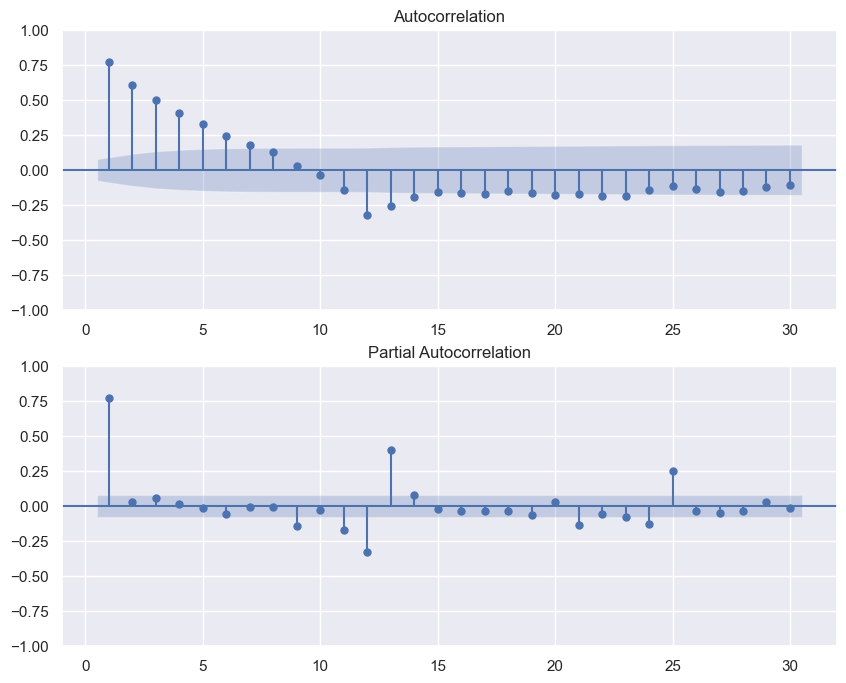

In [17]:
ig, ax =plt.subplots(2,1,figsize = (10,8))
# 1er subgrafica
plot_acf(datos['Diff'].dropna(), zero = False, lags=30, ax=ax[0])
# 2da subgrafica
plot_pacf(datos['Diff'].dropna(), zero = False, lags=30, ax=ax[1])
plt.show()

La grafica muestra un patron regular, por lo tanto, significa que esta serie cuenta con un componte estacionario.\nEs decir, durante el año se notran patrones de aumento o disminucion en los meses.

### 10. Modelo Autoarima

In [18]:
pm.auto_arima(datos['Inflación'],start_p=1, start_q=1,max_p=7,max_q=7,
              seasonal=True,m=12,start_P=1, start_Q=1,max_P=7, max_Q=7,
              ic='aic')

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 3, 12),
      suppress_warnings=True, with_intercept=False)

### 11. Estimar Modelo Arima

In [19]:
modelo = ARIMA(datos['Inflación'], order=(1,1,0), seasonal_order=(1,0,3,12))
results = modelo.fit()
print(results.summary())

c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                         
Dep. Variable:                                Inflación   No. Observations:                  645
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood               -1138.474
Date:                                  Sun, 12 Nov 2023   AIC                           2288.949
Time:                                          21:51:55   BIC                           2315.755
Sample:                                      01-01-1970   HQIC                          2299.351
                                           - 09-01-2023                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8410      0.009     90.840      0.000       0.823

**ar.L1** = Se refiere a la parte autoregresiva del modelo ARIMA. Un valor de 0.8410 indica una fuerte dependencia de la observación anterior.

**ar.S.L12** =  El valor negativo sugiere una relación inversa

**ma.S.L12** =  En este caso, el valor no es significativo (p-value alto), lo que podría indicar que la componente de media móvil estacional no es necesaria.

**ma.S.L24** = Este coeficiente se refiere a otro componente de media móvil estacional con un período de 24 meses. Un valor negativo indica una relación inversa

**ma.S.L36** = Este coeficiente se refiere a la componente de media móvil estacional con un período de 36 meses.

**sigma2** = Representa la varianza del término de error en el modelo.

### 12. Pronostico

Se realiza un pronostico de los siguientes 5 meses, es decir de Octubre, Noviembre y Diciembre del 2023 y Enero y Febrero del 2024:

In [20]:
pronostico = [results.predict('2023-10-01','2024-02-01')]
forecast = results.get_forecast(steps=5)
print(forecast.predicted_mean)

2023-10-01    4.506693
2023-11-01    4.566456
2023-12-01    4.596509
2024-01-01    4.545107
2024-02-01    4.533914
Freq: MS, Name: predicted_mean, dtype: float64


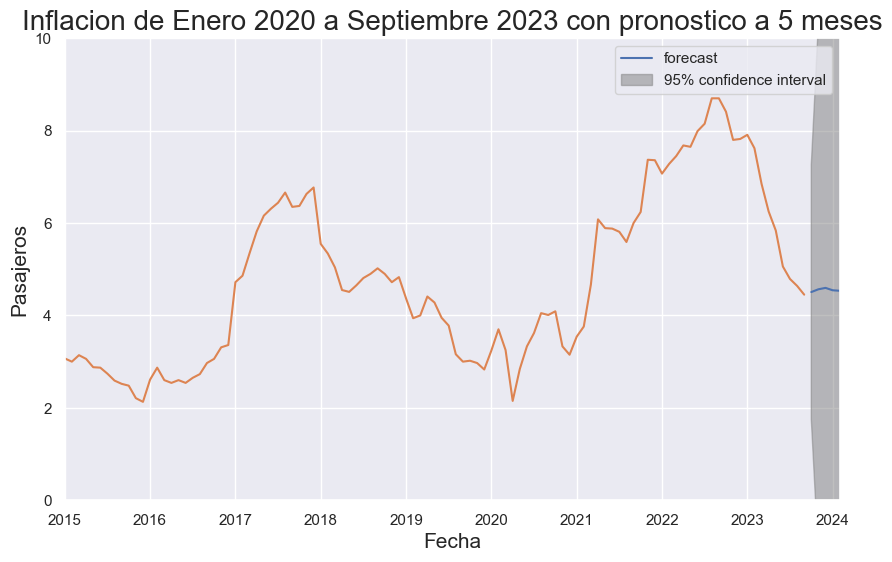

In [21]:
plot_predict(results, start='2023-10-01', end='2024-02-01')
datos['Inflación']['2015':].plot()
plt.title('Inflacion de Enero 2020 a Septiembre 2023 con pronostico a 5 meses', fontsize=20)
plt.ylabel('Pasajeros', fontsize=15)
plt.xlabel('Fecha', fontsize=15)
plt.ylim(0,10)
plt.show()